In [2]:
import pandas as pd
import numpy as np
import csv
import re
import nltk
from nltk.tokenize import TweetTokenizer 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import emoji
import scipy

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



pd.set_option('display.max_colwidth', -1) # to show all the content of the colum text

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#TODO: 


# pre: histogram lenght by sentiment
# pre: print most frequent words (vedere a che frequenze si arriva con 1000)
# create new feature made of: must common words (1000) + lenght (1) + emotinc frequency (n?)
# quaderno





In [3]:
# IMPORT TWEET FILE

df = pd.read_csv("C:/Users/cvalentino/Desktop/UB - Data Science/Project/data/tweets_publics_2.csv", encoding='utf-16', 
                 index_col='tweet_id', 
                 sep=',')

df.airline_sentiment = pd.Categorical(df.airline_sentiment)


df.head(2)

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga tras ver reconocidos sus sindicatos"" by El País via Últimas noticias… https://t.co/80Fz6dxP9t",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las declaraciones de amor entre los #rubijarena no pueden quedarse en una ma… https://t.co/GWKJGhhubY",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN


In [4]:
# upload a spanish stop words list

spanish_stp_wrd = pd.read_csv("C:/Users/cvalentino/Desktop/UB - Data Science/Project/spanish_stop_words.csv", encoding='ansi')

spanish_stp_wrd = spanish_stp_wrd.word.tolist()



In [5]:
# DEFINITION OF CLEANING FUNCTION 

def clean_tweets(tweet):
    
    #Convert all to lower case
    tweet = tweet.lower()
       
    #Convert www.* or https://.* to ''
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    
    #Convert @username to ''
    tweet = re.sub('@[^\s]+','',tweet) 
    
    #Convert #word to word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #remove everything that is not letter (eliminates numbers, commas, brackets, ...) - manages properly spanish accents
    tweet = re.sub("[^a-záéíóúñüA-Z]", " ",tweet) 
        
      
    # Repeating words like happyyyyyyyy
    rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE)
    tweet = rpt_regex.sub(r"\1\1", tweet)
     
    
    
    #Stop words (spanish)
    #managed by count vectorizer
    
    
    
    return tweet



In [6]:
# function to remove spanish stop words

def replace_stop_words(tweet):
    
    tokens = tweet.strip().split()
    
    for i,t in enumerate(tokens):
        if t in spanish_stp_wrd:
            tokens[i] = ''
    
    return ' '.join(tokens)


In [7]:
# stemming function

#stemmer = nltk.stem.PorterStemmer()
stemmer = nltk.stem.SnowballStemmer('spanish')


def stemm_words(tweet):  
    
    tokens = tweet.strip().split()

    tweet = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tweet)



In [8]:
# emoticon substitution functions (with their decription)


def emot_sub(tweet):
    
    for emot, descr in emoj_dic.items():
        tweet = tweet.replace(emot, ' ' + descr + ' ') 
    
    return tweet



def clean_space_emj(descr):
    
    #Convert all to lower case
    descr = descr.replace(" ", "")
    
    return descr



emoj_df = pd.DataFrame.from_dict(emoji.UNICODE_EMOJI, orient = 'index')

emoj_df.columns = ['descr']

emoj_df['descr_clean'] = emoj_df.descr.apply(clean_tweets)
emoj_df['descr_clean'] = emoj_df.descr_clean.apply(clean_space_emj)

emoj_dic = emoj_df['descr_clean'].to_dict()




    
    

In [9]:
#trim function (Removes extra whitespaces in the text)

def space_trim(tweet):
    tweet = tweet.strip('\'')
    #tweet = re.sub(' +','  ',tweet)
    return tweet


In [10]:
# tweet lenght function

def tweet_len(tweet):  
    
    tokens = tweet.strip().split()
    
    return len(tokens)

In [11]:
# function to plot confusion matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
#CREATION OF THE CLEANSED DB: 

df_clean = df[['airline_sentiment', 'text']].copy()
df_clean['text_clean'] = df_clean.text.apply(emot_sub)
df_clean['text_clean'] = df_clean.text_clean.apply(clean_tweets)
df_clean['text_clean'] = df_clean.text_clean.apply(stemm_words)
df_clean['text_clean'] = df_clean.text_clean.apply(space_trim)
df_clean['text_clean'] = df_clean.text_clean.apply(replace_stop_words)
df_clean['text_clean'] = df_clean.text_clean.apply(space_trim)

# ADD NORMALIZED LENGHT AS FEATURE


df_clean['text_clean_len_abs'] = df_clean.text_clean.apply(tweet_len)

avg_len = df_clean['text_clean_len_abs'].mean()

df_clean['text_clean_len'] = df_clean.text_clean_len_abs.apply(lambda x : x/avg_len)


df_clean

,airline_sentiment,text,text_clean,text_clean_len_abs,text_clean_len
tweet_id,,,,,
942743012337123328,positive,"""Los pilotos de Ryanair desconvocan la huelga tras ver reconocidos sus sindicatos"" by El País via Últimas noticias… https://t.co/80Fz6dxP9t",pilot de ryan desconvoc huelg ver reconoc sindicat by pais via ultim notici,13,1.134630
926857871916183553,positive,"@Iberia @lavecinarubia Si ,por favor las declaraciones de amor entre los #rubijarena no pueden quedarse en una ma… https://t.co/GWKJGhhubY",favor declar de amor rubijaren no pued qued ma,9,0.785513
936979305720090626,neutral,@Iberia Me dirías por favor que costo tiene?,me dir favor que cost tien,6,0.523675
943983853802328064,negative,"@SupermanlopezN @Iberia @giroditalia Champion, no vuele más con esos descarados.",champion no vuel mas esos descar,6,0.523675
938207464457211904,negative,@SrtaFarrellDM @KLM @Iberia Eso de avianca es verdad a mi mama le paso dos veces terrible esa aerolínea 😤,eso de avianc verd a mi mam le pas vec terribl esa aeroline facewithsteamfromnos,14,1.221909
931526746301714435,neutral,"@Iberia hola, no conozco mi numéro IBERIA PLUS, ellos pueden ayudar? mail ackerm@gmx.de - (tengo el código PIN); gracias",hol no conozc mi numer iberi plus pued ayud mail ackerm teng codig pin graci,15,1.309188
933385784228532233,neutral,"El canal Smithsonian reconstruye en video el accidente aereo de Spanair en Barajas, el masmortifero en España en 25… https://t.co/DwDDLA8wT9",canal smithsoni reconstru vide accident aere de span baraj masmortifer españ,11,0.960071
932856751099142144,positive,"Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio https://t.co/z7mnq6ue9X",mi destin a sol click deseadm suert holacolombi hol destin europe al mejor preci,14,1.221909
927623530585509889,negative,"@facua Pueden ayudarme con una maleta perdida por iberia? por favor, no hacen nada por buscarla y el telefono de reclamacion es un 901",pued ayud malet perd iberi favor no hac nad busc y telefon de reclamacion,14,1.221909


In [13]:
# REMOVE ROWS WITH EMPTY CLEANSED TWEETS

df_clean = df_clean[~df_clean.text_clean_len.apply(lambda a: False if a != 0 else True)]

In [13]:
#FEATURE EXTRACTION
# feature extraction as count vectorizer (with spanish stop words)


vect = CountVectorizer(analyzer = 'word', max_features=1000, lowercase = True,  
                     stop_words = spanish_stp_wrd, strip_accents='unicode', ngram_range= (1,1))  


In [14]:
# feature extraction as TfidfVectorizer (with spanish stopwords)

vect = TfidfVectorizer(max_features=8000, 
                         strip_accents='unicode', analyzer='word', 
                         ngram_range= (1,1), use_idf=True, 
                         smooth_idf=True, sublinear_tf=True,
                         stop_words = spanish_stp_wrd)

In [15]:
# MODELS DEFINITION

BERN = BernoulliNB()
LOG = LogisticRegression()
SVM = svm.SVC()
RANDF = RandomForestClassifier()
MLP = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), max_iter= 200)

In [ ]:
#UNIQUE RUN: building feature X and label Y only 

split_coeff = 0.20

train, test = train_test_split(df_clean, test_size = split_coeff, random_state = 42 )


X_train = vect.fit_transform(train.text_clean)
y_train = train.airline_sentiment

X_test = vect.transform(test.text_clean)
y_test = test.airline_sentiment




In [16]:
#UNIQUE RUN: building feature X and label Y + lenght

split_coeff = 0.20

train, test = train_test_split(df_clean, test_size = split_coeff, random_state = 42 )


# features from vect
X_train = vect.fit_transform(train.text_clean)

#additional feature from lenght
train_len = pd.DataFrame(train.text_clean_len, index = train.index)
X_train = pd.DataFrame(X_train.toarray(), index=train.index) #preserving indeces
X_train = pd.merge(X_train, train_len, left_index = True, right_index = True)

# back to sparse
X_train = scipy.sparse.csr_matrix(X_train)

y_train = train.airline_sentiment


X_test = vect.transform(test.text_clean)
test_len = pd.DataFrame(test.text_clean_len, index = test.index)
X_test = pd.DataFrame(X_test.toarray(), index=test.index)
X_test = pd.merge(X_test, test_len, left_index = True, right_index = True)
X_test = scipy.sparse.csr_matrix(X_test)


y_test = test.airline_sentiment


In [18]:
# MODEL FIT (UNIQUE RUN)

model = MLP

#BERN = BernoulliNB()
#LOG = LogisticRegression()
#SVM = svm.SVC()
#RANDF = RandomForestClassifier()
#MLP = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), max_iter= 200)


model.fit(X_train,y_train)
y_pred = model.predict(X_test) 

#model1.fit(X_train,y_train)
#model2.fit(X_train,y_train)
#model3.fit(X_train,y_train)
#model6.fit(X_train,y_train)

#y_pred1 = model1.predict(X_test) 
#y_pred2 = model2.predict(X_test) 
#y_pred3 = model3.predict(X_test)
#y_pred6 = model6.predict(X_test) 




In [51]:
# CROSS VALIDATION


model = 

#BERN = BernoulliNB()
#LOG = LogisticRegression()
#SVM = svm.SVC()
#RANDF = RandomForestClassifier()
#MLP = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), max_iter= 200)



X1 = vect.fit_transform(df_clean.text_clean)
X1 = pd.DataFrame(X1.toarray(), index = df_clean.index)
X2 = pd.DataFrame(df_clean.text_clean_len, index = df_clean.index)   # PRESERVE INDICES FROM SOURCE DB WHEN JOINING
X = pd.merge(X1, X2, left_index = True, right_index = True)
X = scipy.sparse.csr_matrix(X)

y = df_clean.airline_sentiment




scores = cross_val_score(model, X, y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.59 (+/- 0.02)


0.56241956242
             precision    recall  f1-score   support

   negative       0.68      0.70      0.69       746
    neutral       0.44      0.50      0.47       514
   positive       0.46      0.33      0.38       294

avg / total       0.56      0.56      0.56      1554

[[522 176  48]
 [191 255  68]
 [ 52 145  97]]
Confusion matrix, without normalization
[[522 176  48]
 [191 255  68]
 [ 52 145  97]]
Normalized confusion matrix
[[ 0.7   0.24  0.06]
 [ 0.37  0.5   0.13]
 [ 0.18  0.49  0.33]]


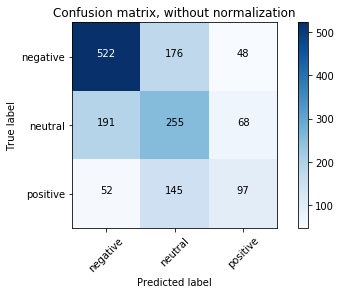

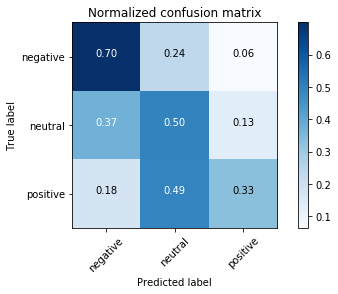

In [19]:

# MODEL RESULTS

print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


#print(metrics.accuracy_score(y_test, y_pred1))
#print(metrics.accuracy_score(y_test, y_pred2))
#print(metrics.accuracy_score(y_test, y_pred3))
#print(metrics.accuracy_score(y_test, y_pred6))

#print(classification_report(y_test, y_pred1))
#print(classification_report(y_test, y_pred2))
#print(classification_report(y_test, y_pred3))
#print(classification_report(y_test, y_pred6))



# Confusion matrix plot

class_names = ['negative', 'neutral', 'positive']


cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

-------------------

SUBMISSION PROCESSES 

--------------------









In [37]:
# RUN FOR SUBMISSIONS

model = BERN

#BERN = BernoulliNB()
#LOG = LogisticRegression()
#SVM = svm.SVC()
#RANDF = RandomForestClassifier()
#MLP = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), max_iter= 200)




X1 = vect.fit_transform(df_clean.text_clean)
X1 = pd.DataFrame(X1.toarray(), index = df_clean.index)
X2 = pd.DataFrame(df_clean.text_clean_len, index = df_clean.index)   # PRESERVE INDICES FROM SOURCE DB WHEN JOINING
X = pd.merge(X1, X2, left_index = True, right_index = True)
X = scipy.sparse.csr_matrix(X)

y = df_clean.airline_sentiment


model.fit(X,y)



# checks for fitting performance
y_check = model.predict(X) 

metrics.accuracy_score(y, y_check)






0.93896471800154524

In [41]:
# upload submission DB


df_submission = pd.read_csv("C:/Users/cvalentino/Desktop/UB/Project/data/tweets_submission.csv", sep=',', index_col = 'tweet_id')



df_submission['text_clean'] = df_submission.text.apply(emot_sub)
df_submission['text_clean'] = df_submission.text_clean.apply(clean_tweets)
df_submission['text_clean'] = df_submission.text_clean.apply(stemm_words)
df_submission['text_clean'] = df_submission.text_clean.apply(space_trim)
df_submission['text_clean'] = df_submission.text_clean.apply(replace_stop_words)
df_submission['text_clean'] = df_submission.text_clean.apply(space_trim)

# ADD NORMALIZED LENGHT AS FEATURE


df_submission['text_clean_len'] = df_submission.text_clean.apply(tweet_len)

avg_len = df_submission['text_clean_len'].mean()

df_submission['text_clean_len'] = df_submission.text_clean_len.apply(lambda x : x/avg_len)

df_submission


,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_clean,text_clean_len
tweet_id,,,,,,,,,,
942273491440631808,True,0,0,@Iberia Está clara vuestra política de rascar por todos lados. Lo q os digo es q en vuelos de 1500€ de clientes fie… https://t.co/9S1YyDJs8I,NaN,Sun Dec 17 06:01:21 +0000 2017,NaN,NaN,clar vuestr polit de rasc tod lad q os dig q vuel de de client fie,1.390782
943008475608682502,False,0,0,Iberia Plus cumple 25 años. Queremos celebrarlo contigo de una manera muy especial. Elige tu número favorito y... ¡… https://t.co/aRf5cPNyL9,NaN,Tue Dec 19 06:41:55 +0000 2017,NaN,NaN,iberi plus cumpl años quer celebr contig de maner especial elig tu numer favorit y,1.303858
931226872729530368,False,0,0,"A ver, @Iberia, de verdad. Lo vuestro con el espacio entre asientos es exagerado. Mido una mierda de 1.70m y no qu… https://t.co/1STiaPpPlP",NaN,Thu Nov 16 18:26:02 +0000 2017,NaN,Madrid,a ver de verd vuestr espaci asient exager mid mierd de m y no qu,1.303858
933782711600283650,False,0,0,".@JavierJover, head of partnership and SMBs en Iberia, recibe a los partners de @PayPalSpain a la presentación del… https://t.co/H02fLILavT",NaN,Thu Nov 23 19:42:01 +0000 2017,NaN,Madrid,head of partnership and smbs iberi recib a partners de a present del,1.130010
941987812534038529,False,0,0,"Faro, Portugal 🇵🇹🤓✈️ https://t.co/Obzj8YlXTL",NaN,Sat Dec 16 11:06:10 +0000 2017,NaN,Hawaii,far portugal portugal nerdfac airplan,0.434619
935837733796368384,True,0,0,"@AirHelp_ES @Iberia Sí, están dejando hoy en overbooking encima a un pasajero que compró su asiento el 23 de marzo.… https://t.co/Yb6HtHqJTK",NaN,Wed Nov 29 11:47:57 +0000 2017,NaN,Greenland,dej hoy overbooking encim a pasajer que compr asient de marz,0.956162
926428166721343488,True,0,0,@Iberia Compañía de bandera de España. Cancelan un vuelo te envían a otro destino y 40 minutos esperando a un autobús. Eficiencia envidiable,NaN,Fri Nov 03 12:37:41 +0000 2017,NaN,NaN,compañ de bander de españ cancel vuel te envi a destin y minut esper a autobus eficient envidi,1.564629
926361816434905093,False,0,0,#iberia #iberiaexpress casi perdemos avión pq una empleada no nos encuentra en el sistema con tarjetas de embarque! Y cobra maletas pagadas!,NaN,Fri Nov 03 08:14:02 +0000 2017,NaN,NaN,iberi iberiaexpress casi perd avion pq emple no encuentr sistem tarjet de embarqu y cobr malet pag,1.477706
937762322923380737,False,0,0,Después de casi un mes con una incidencia de equipaje Tengo respuesta demencial de Iberia ... llevo todo el día int… https://t.co/6QT2rYXwSJ,NaN,Mon Dec 04 19:15:35 +0000 2017,NaN,NaN,despues de casi mes incident de equipaj teng respuest demencial de iberi llev tod dia int,1.390782


In [42]:
# predict value of submission

X1_s = vect.transform(df_submission.text_clean)
X1_s = pd.DataFrame(X1_s.toarray(), index = df_submission.index)
X2_s = pd.DataFrame(df_submission.text_clean_len, index = df_submission.index)   # PRESERVE INDICES FROM SOURCE DB WHEN JOINING

X_s = pd.merge(X1_s, X2_s, left_index = True, right_index = True)
X_s = scipy.sparse.csr_matrix(X_s)



y_pred = model.predict(X_s) 

In [43]:
# create submission file

import datetime

def create_submit_file(df_submission, ypred):
    date = datetime.datetime.now().strftime("%m_%d_%Y-%H_%M_%S")
    filename = 'submission_' + date + '.csv'
    
    df_submission['airline_sentiment'] = ypred
    df_submission[['airline_sentiment']].to_csv(filename)
    
    print('Submission file created: {}'.format(filename))
    print('Upload it to Kaggle InClass')

    
create_submit_file(df_submission, y_pred)

Submission file created: submission_06_08_2018-21_39_35.csv
Upload it to Kaggle InClass


In [66]:
#MULTIPLE RUNS (calculation)

n_models=4
split_coeff = 0.20
rep = 5

acc_r = np.zeros((rep, n_models))


for i in range(rep):
    
    
    train, test = train_test_split(df_clean, test_size = split_coeff)                 # split test - training set
            
    X_train = vect.fit_transform(train.text_clean)
    y_train = train.airline_sentiment

    X_test = vect.transform(test.text_clean)
    y_test = test.airline_sentiment                               # model fit
    
    model1.fit(X_train,y_train)
    model2.fit(X_train,y_train)
    model3.fit(X_train,y_train)
    model6.fit(X_train,y_train)

    y_pred1 = model1.predict(X_test) 
    y_pred2 = model2.predict(X_test) 
    y_pred3 = model3.predict(X_test)
    y_pred6 = model6.predict(X_test) 
    
    
    acc_r[i][0] = metrics.accuracy_score(y_test, y_pred1)         # accuracy cal
    acc_r[i][1] = metrics.accuracy_score(y_test, y_pred2)
    acc_r[i][2] = metrics.accuracy_score(y_test, y_pred3)
    acc_r[i][3] = metrics.accuracy_score(y_test, y_pred6)




C:\Users\cvalentino\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


BernoulliNB               0.590851
LogisticRegression        0.602414
SVM                       0.484752
RandomForestClassifier    0.565947
dtype: float64


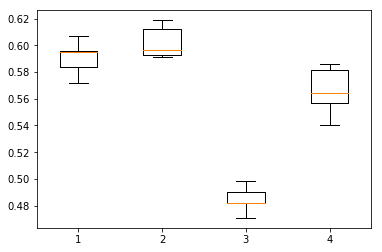

In [67]:
# MULTIPLE RUN (graph)

results = pd.DataFrame(acc_r, columns = ['BernoulliNB', 'LogisticRegression',	'SVM',	 'RandomForestClassifier'])
print(results.mean())


plt.boxplot(acc_r)
plt.show()
ax = plt.gca()
ax.set_xticklabels(['BernoulliNB', 'LogisticRegression',	'SVM',	 'RandomForestClassifier'])


In [13]:
# stemming function example of functioning

word = 'declaraciones of '

ps1 = nltk.stem.PorterStemmer()
a = ps1.stem(word)

ps2 = nltk.stem.SnowballStemmer('porter')
b = ps2.stem(word)

print(a,b)


declaraciones of  declaraciones of 


In [24]:
# where are we wrong???

#df_result1 = df_clean[['text', 'text_clean', 'airline_sentiment']].copy()

y_pred2 = pd.DataFrame(y_pred2, index = y_test.index)

df_result = pd.merge(df_clean[['text', 'text_clean', 'airline_sentiment']], y_pred2, left_index = True, right_index = True)


df_result

,text,text_clean,airline_sentiment,0
0,"""Los pilotos de Ryanair desconvocan la huelga tras ver reconocidos sus sindicatos"" by El País via Últimas noticias… https://t.co/80Fz6dxP9t",pilot de ryan desconvoc huelg ver reconoc sindicat by pais via ultim notici,positive,positive
8,"@facua Pueden ayudarme con una maleta perdida por iberia? por favor, no hacen nada por buscarla y el telefono de reclamacion es un 901",pued ayud malet perd iberi favor no hac nad busc y telefon de reclamacion,negative,negative
14,@Iberia A350!? Los van a usar en la ruta a EZE?,a a rut a eze,neutral,positive
17,"Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio https://t.co/KlQ0gqBp56",mi destin a sol click deseadm suert holaargentin hol destin europe al mejor preci,neutral,neutral
19,"Iberia ampliará oferta de asientos a México, Argentina y Colombia https://t.co/1rKYoj1R0b #Turismo #México",iberi ampli ofert de asient a mexic argentin y colombi turism mexic,positive,negative
23,@Iberia No te preocupes @Iberia esperaré a que me toque algo en el #SorteoDeNavidad #CMUOC https://t.co/R17FtE54Gb,no te preocup esper a que me toqu algo sorteodenav cmuoc,negative,negative
26,COSMO K - RYANAIR @OchoYMedioClub 15/12/2017: https://t.co/Qzq69heWIq vía @YouTube,cosm k ryan via,neutral,positive
31,"@Iberia @herifrade No, no. Por aquí mola más. Así os calamos.",no no aqu mol mas asi os cal,neutral,negative
33,Ofrecemos los suiguientes destinos : ✈ARGENTINA-GOL AIRLINES 600$ ✈MADRID-IBERIA AIRLINES 1200$ ✈CHILE-LATHAN AIRLI… https://t.co/blSAQa7TZc,ofrec suiguient destin airplan argentin gol airlin airplan madr iberi airlin airplan chil lath airli,neutral,neutral
37,"La suerte no es para siempre, Iberia desciende a segunda división ►",suert no par siempr iberi desciend a segund division,negative,negative


In [ ]:
#Exploration 

fig = figure()
ax = axes()
hold(True)

neg = df_clean['text_clean_len'][df_clean['airline_sentiment'] == 'negative']
pos = df_clean['text_clean_len'][df_clean['airline_sentiment'] == 'positive']
neu = df_clean['text_clean_len'][df_clean['airline_sentiment'] == 'neutral']


plt.boxplot(neg.values, positions = [1])
plt.boxplot(pos.values, positions = [2])
plt.boxplot(net.values, positions = [3])
ax.set_xticklabels(['neg', 'pos', 'neu'])
ax = plt.gca()

plt.show()


In [ ]:
# exploration

print(neg.describe(), pos.describe(), neu.describe())